In [2]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import seaborn as sns
iris = load_iris()

In [63]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [64]:
data = pd.DataFrame(iris.data, columns = iris.feature_names)
data.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

In [37]:
data['label'] = iris.target

In [38]:
set(iris.target), iris.target_names

({0, 1, 2}, array(['setosa', 'versicolor', 'virginica'], dtype='<U10'))

In [39]:
data.sample(5)

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
39                5.1               3.4                1.5               0.2   
6                 4.6               3.4                1.4               0.3   
54                6.5               2.8                4.6               1.5   
3                 4.6               3.1                1.5               0.2   
43                5.0               3.5                1.6               0.6   

    label  
39      0  
6       0  
54      1  
3       0  
43      0

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   label              150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [41]:
setosa = data[data['label']== 0]

In [42]:
setosa.sample(5)

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
32                5.2               4.1                1.5               0.1   
45                4.8               3.0                1.4               0.3   
43                5.0               3.5                1.6               0.6   
3                 4.6               3.1                1.5               0.2   
48                5.3               3.7                1.5               0.2   

    label  
32      0  
45      0  
43      0  
3       0  
48      0

<AxesSubplot:>

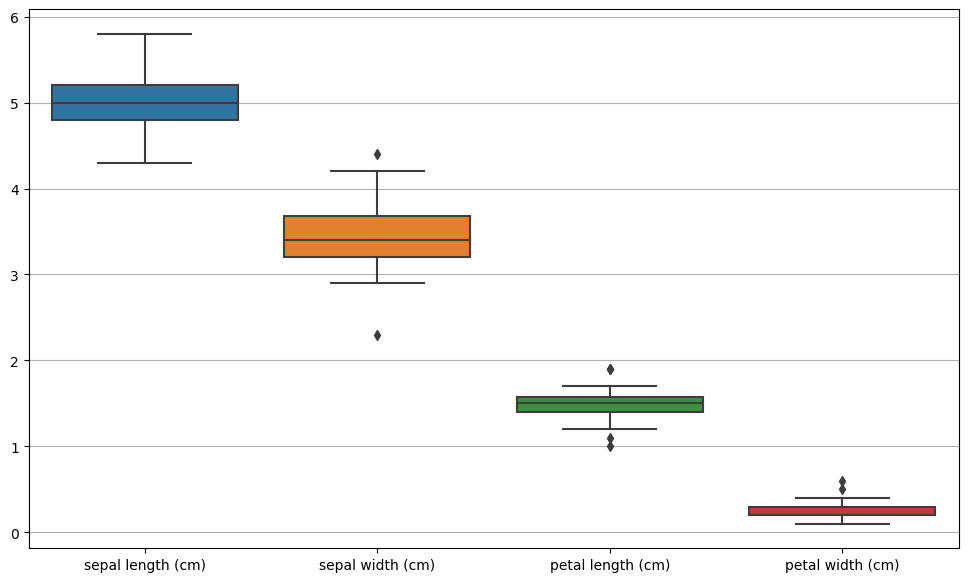

In [43]:
plot_setosa = setosa.drop('label', axis=1)
import matplotlib.pyplot as plt
plt.figure(figsize = (12,7))
plt.grid()
sns.boxplot(data = plot_setosa)

In [44]:
from matplotlib.cbook import boxplot_stats


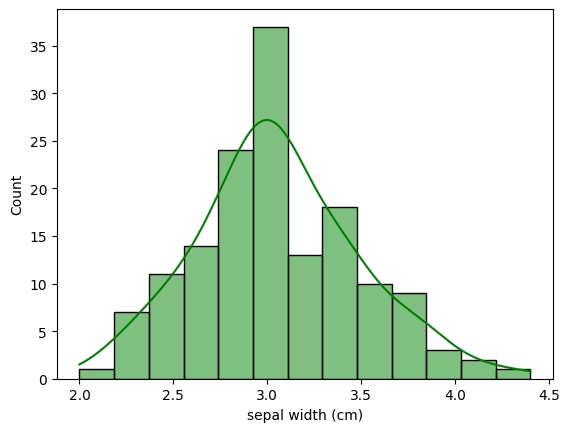

In [45]:
sns.histplot(data["sepal width (cm)"], kde= True, color= 'green');

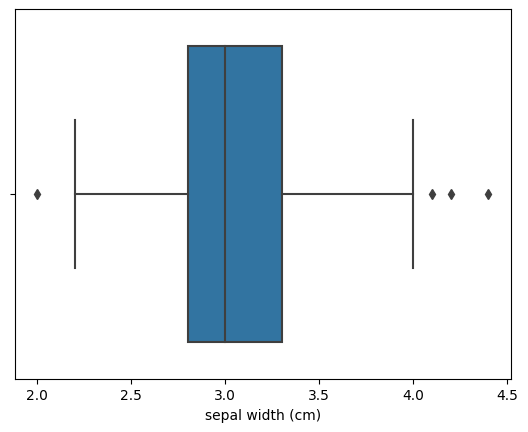

In [46]:
sns.boxplot(data=data, x='sepal width (cm)');


In [47]:
stats = boxplot_stats(data['sepal width (cm)'])


In [48]:
stats

[{'mean': 3.0573333333333337,
  'iqr': 0.5,
  'cilo': 2.9359050183971735,
  'cihi': 3.0640949816028265,
  'whishi': 4.0,
  'whislo': 2.2,
  'fliers': array([2. , 4.4, 4.1, 4.2]),
  'q1': 2.8,
  'med': 3.0,
  'q3': 3.3}]

In [67]:
def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)

    IQR = Q3 - Q1
    print(Q1,Q3,IQR)
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return outliers

In [68]:
outliers = detect_outliers_iqr(data['sepal width (cm)'])

2.8 3.3 0.5


In [51]:
data_wo_outliers = data[~data['sepal width (cm)'].isin(outliers)]

<AxesSubplot:>

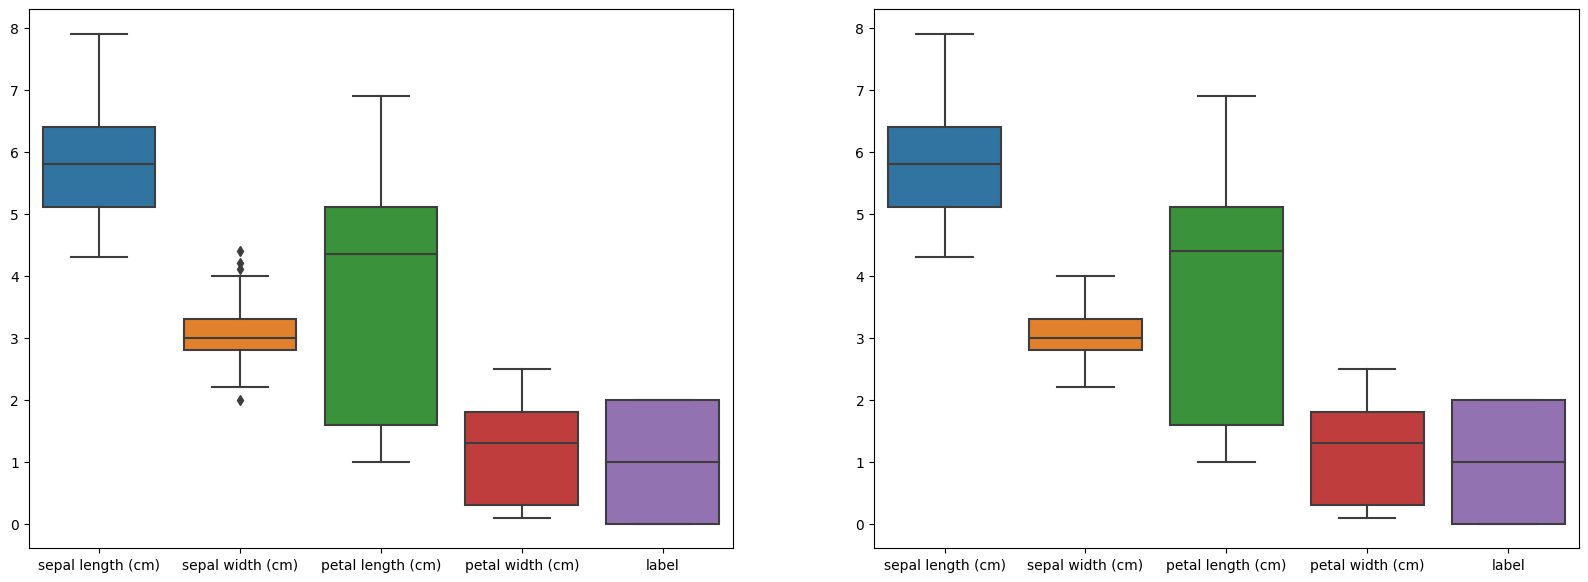

In [58]:
fig, axs = plt.subplots(1, 2, figsize=(20, 7))
sns.boxplot(ax=axs[0], data=data)
sns.boxplot(ax=axs[1], data=data_wo_outliers)


In [73]:
def detect_outliers_iqr2(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1

    minimum = Q1 - 1.5*IQR
    maximum = Q3 + 1.5*IQR

    outliers = data[(data < minimum) | (data > maximum)]
    return outliers


In [78]:
outliers = detect_outliers_iqr2(data['sepal width (cm)'])

In [79]:
outliers

15    4.4
32    4.1
33    4.2
60    2.0
Name: sepal width (cm), dtype: float64

In [80]:
data_new = data[~data['sepal width (cm)'].isin(outliers)]

<AxesSubplot:>

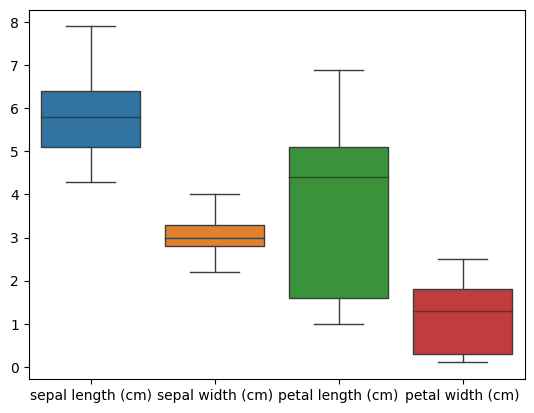

In [93]:
sns.boxplot(data_new, linewidth= 1,)